# <span style="color:#4CCFA2">[M6] 🧪 Lab - EDA Practice w/ Taxi Dataset</span> 🚕

The taxi dataset in Seaborn contains information related to taxi rides, such as pickup and drop-off locations, timestamps, trip distances, fares, and other relevant attributes. This dataset is commonly employed for practicing data visualization and exploratory data analysis (EDA) techniques using Seaborn and other Python data analysis libraries.


In [1]:
# Imports
import pandas as pd
import seaborn as sns
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt


## I. Read in the data

In [2]:
df = sns.load_dataset('taxis')

## II. First Look at the Data

In [3]:
df

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [4]:
df.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [6]:
df.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570


In [7]:
df.describe(include = 'O')

,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
count,6433,6389,6407,6388,6407,6388
unique,2,2,194,203,4,5
top,yellow,credit card,Midtown Center,Upper East Side North,Manhattan,Manhattan
freq,5451,4577,230,245,5268,5206


<Axes: >

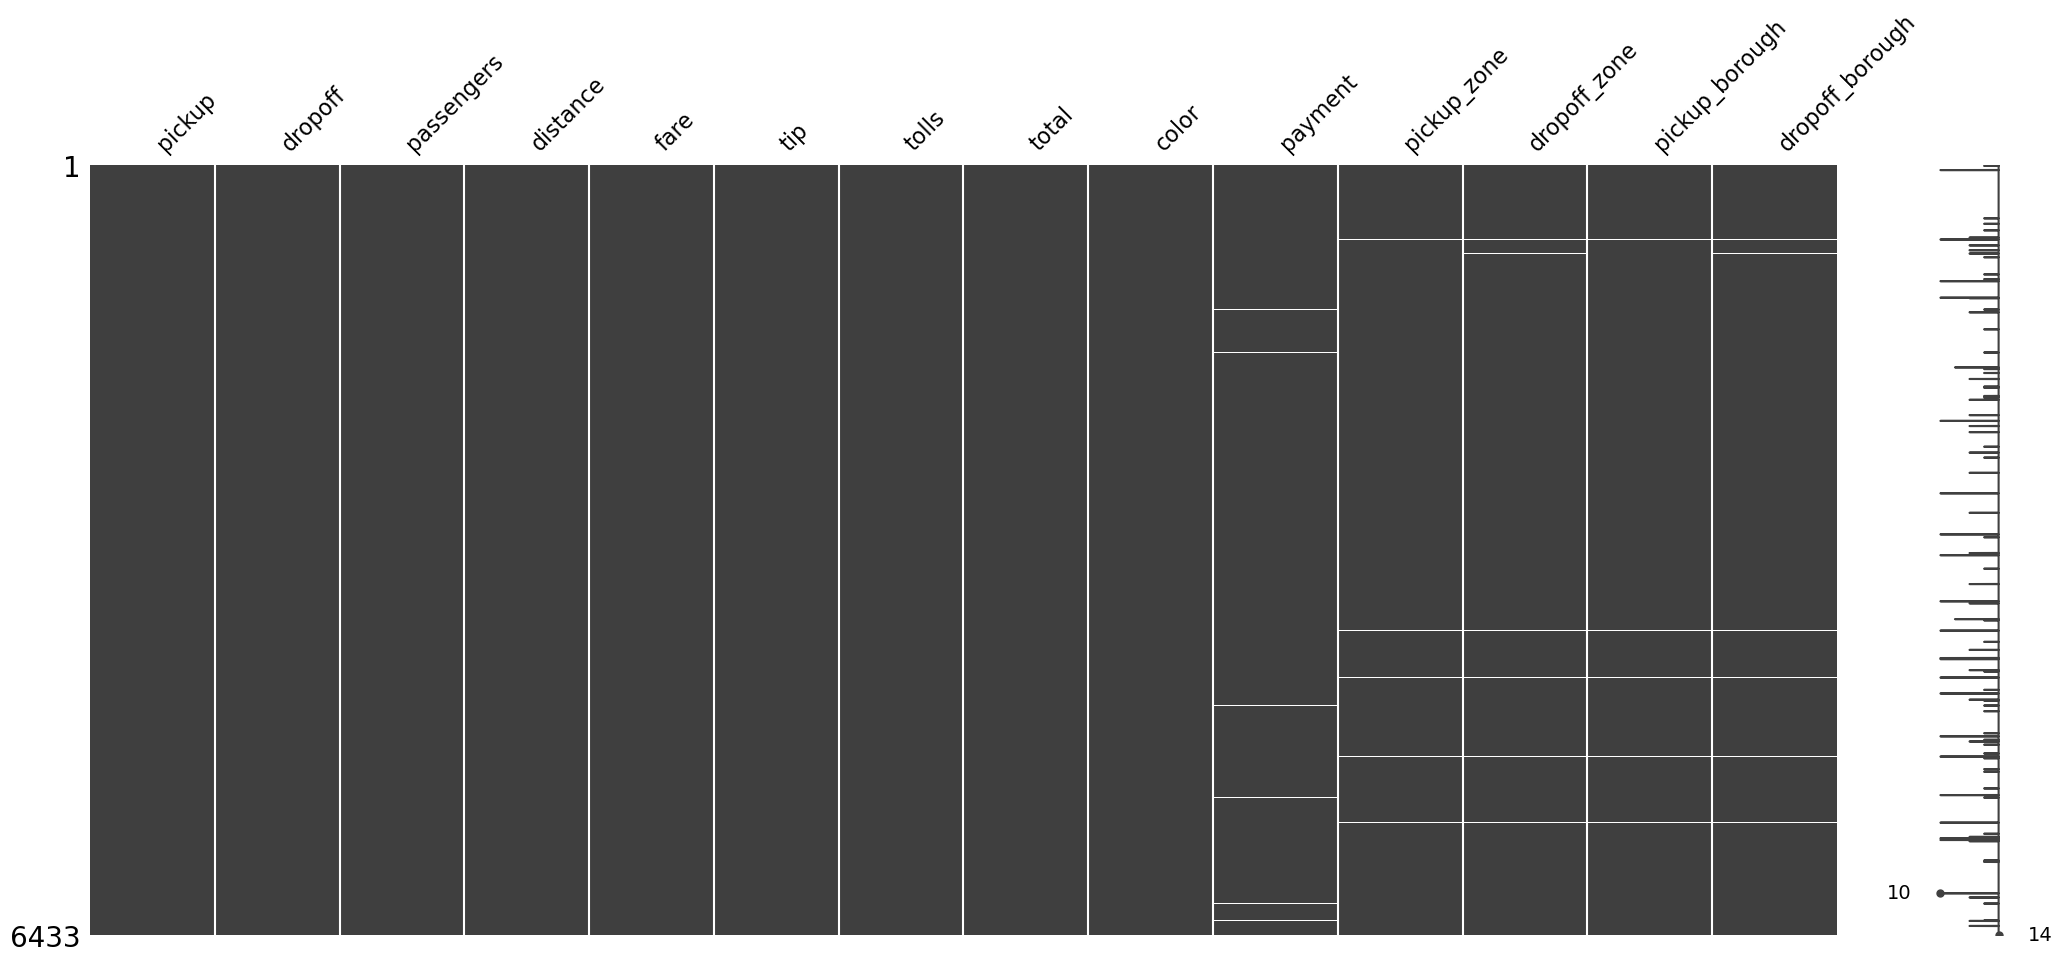

In [8]:
msno.matrix(df)

## III. Feature Engineering

Let's engineer some more features - What ideas do you have?

In [9]:
df['payment'].value_counts(dropna = False)

payment
credit card    4577
cash           1812
NaN              44
Name: count, dtype: int64

In [10]:
df['payment'] = df['payment'].fillna(value = 'credit card')

In [11]:
df['pickup_borough'].value_counts(dropna = False)

pickup_borough
Manhattan    5268
Queens        657
Brooklyn      383
Bronx          99
NaN            26
Name: count, dtype: int64

In [12]:
df['pickup_borough'] = df['pickup_borough'].fillna(value = 'Manhattan')

In [13]:
df['dropoff_borough'].value_counts(dropna = False)

dropoff_borough
Manhattan        5206
Queens            542
Brooklyn          501
Bronx             137
NaN                45
Staten Island       2
Name: count, dtype: int64

In [14]:
df['dropoff_borough'] = df['dropoff_borough'].fillna(value = 'Manhattan')

In [15]:
df = df.dropna()

In [28]:
df

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,same_borough,trip_time,day_of_week,time_of_day,trip_time_minutes
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,True,0 days 00:06:15,Saturday,20,6.250000
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,True,0 days 00:07:05,Monday,16,7.083333
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,True,0 days 00:07:24,Wednesday,17,7.400000
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,True,0 days 00:25:52,Sunday,1,25.866667
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,True,0 days 00:09:32,Saturday,13,9.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan,True,0 days 00:03:34,Sunday,9,3.566667
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx,False,0 days 00:56:23,Sunday,17,56.383333
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn,True,0 days 00:19:07,Saturday,22,19.116667
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn,True,0 days 00:05:04,Monday,10,5.066667


In [17]:
ex_1 = 'Manhattan'
ex_2 = 'Manhattan'
ex_3 = 'Queens'


def same_borough(row):
    if row['pickup_borough'] == row['dropoff_borough']:
        return True
    else:
        return False



In [18]:
df['same_borough'] = df.apply(same_borough, axis = 1)

/tmp/ipykernel_5323/912893700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['same_borough'] = df.apply(same_borough, axis = 1)


In [19]:
df['trip_time'] = df['dropoff'] - df['pickup'] 

/tmp/ipykernel_5323/2028057312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trip_time'] = df['dropoff'] - df['pickup']


In [20]:
df['day_of_week'] = df['pickup'].dt.day_name()

/tmp/ipykernel_5323/1741212054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = df['pickup'].dt.day_name()


In [21]:
df['time_of_day'] = df['pickup'].dt.hour

/tmp/ipykernel_5323/2033299317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_of_day'] = df['pickup'].dt.hour


In [27]:
df['trip_time_minutes'] = df['trip_time'].dt.seconds / 60

/tmp/ipykernel_5323/4047098290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trip_time_minutes'] = df['trip_time'].dt.seconds / 60


## III. Exploratory Data Analysis

Please answer the following questions. Remember to include a markdown cell following each visualization to highlight the key insight derived from the visual representation!

1. **Passenger Count Analysis**:
   - **Question**: How does the number of passengers vary across taxi trips?
     - **Visualization**: Create a count plot showing the distribution of passenger counts.


> The vast majority people that take taxi trips usually tend to take them as a single passenger, with 4638 passengers taking them as a single passenger, the second closest is with two people where they account for 870 of the trips

Text(0, 0.5, 'Frequency of Passenger Trips')

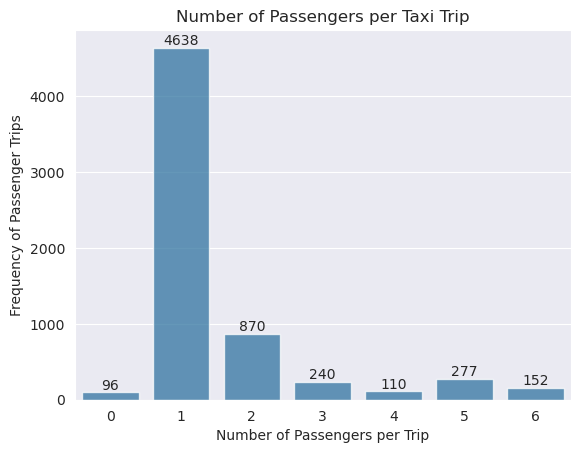

In [32]:
sns.set_style('darkgrid')
colors = sns.color_palette("Paired")
ax = sns.countplot(data = df, 
             x = 'passengers', 
             alpha = 0.75)
 
ax.bar_label(ax.containers[0], label_type = 'edge')
plt.title('Number of Passengers per Taxi Trip')
plt.xlabel('Number of Passengers per Trip')
plt.ylabel('Frequency of Passenger Trips')


2. **Fare Analysis**:
   - **Question**: What is the range of fares for taxi rides?
     - **Visualization**: Plot a histogram to visualize the distribution of fares. Maybe play around with the binwidth.
     - **Follow Up Question**: After your visualization, can you filter your dataframe to identify the ride that had the largest fare?


> the range of taxi rides appears to be quite small, with the vast majority of taxi rides being between 0 and 20 dollars

Text(0, 0.5, 'Frequency of Fare Prices')

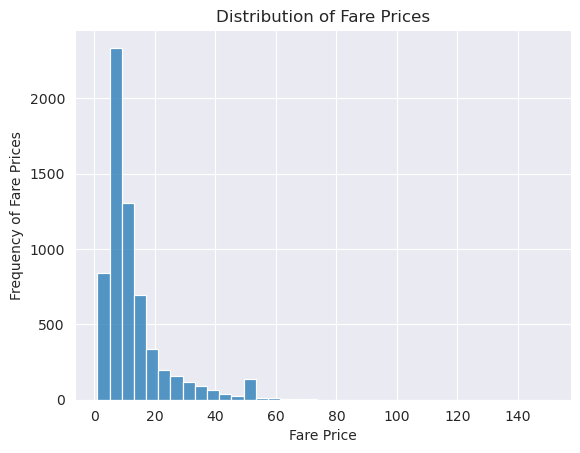

In [40]:
sns.histplot(data = df, 
            x = 'fare', 
            binwidth = 4)
plt.title('Distribution of Fare Prices')
plt.xlabel('Fare Price')
plt.ylabel('Frequency of Fare Prices')

In [114]:
df.sort_values(by = 'fare', ascending = False)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,arrival_time,trip_time
5364,2019-03-17 16:59:17,2019-03-17 18:04:08,2,36.70,150.00,0.00,24.02,174.82,yellow,cash,JFK Airport,JFK Airport,Queens,Queens,0 days 01:04:51,0 days 01:04:51
5567,2019-03-07 00:28:57,2019-03-07 02:02:55,1,25.51,93.50,0.00,0.00,94.80,green,credit card,Sunset Park West,Saint Albans,Brooklyn,Queens,0 days 01:33:58,0 days 01:33:58
5827,2019-03-05 10:34:36,2019-03-05 11:44:01,1,20.64,86.14,0.00,5.76,92.40,green,credit card,Coney Island,Upper East Side North,Brooklyn,Manhattan,0 days 01:09:25,0 days 01:09:25
6053,2019-03-05 07:23:49,2019-03-05 09:11:29,1,22.17,81.86,0.00,0.00,82.36,green,credit card,University Heights/Morris Heights,Yorkville East,Bronx,Manhattan,0 days 01:47:40,0 days 01:47:40
4218,2019-03-29 17:32:20,2019-03-29 18:53:52,1,26.92,75.50,23.19,0.00,100.49,yellow,credit card,JFK Airport,Cobble Hill,Queens,Brooklyn,0 days 01:21:32,0 days 01:21:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5460,2019-03-30 03:38:08,2019-03-30 03:38:50,1,0.07,2.50,0.00,0.00,3.80,green,cash,East Concourse/Concourse Village,East Concourse/Concourse Village,Bronx,Bronx,0 days 00:00:42,0 days 00:00:42
1851,2019-03-02 19:20:18,2019-03-02 19:21:06,1,0.10,2.50,0.00,0.00,5.80,yellow,credit card,Lenox Hill West,Upper East Side South,Manhattan,Manhattan,0 days 00:00:48,0 days 00:00:48
5697,2019-03-19 07:20:21,2019-03-19 07:20:25,1,0.00,2.50,0.00,0.00,3.30,green,cash,Dyker Heights,Dyker Heights,Brooklyn,Brooklyn,0 days 00:00:04,0 days 00:00:04
1848,2019-03-25 18:15:35,2019-03-25 18:16:08,2,0.07,2.50,0.00,0.00,4.30,yellow,credit card,Williamsbridge/Olinville,Williamsbridge/Olinville,Bronx,Bronx,0 days 00:00:33,0 days 00:00:33



3. **Trip Duration Analysis**:
   - **Question**: How long are typical taxi trips?
     - **Visualization**: Create a histogram or box plot to show the distribution of trip durations.
   - **Question**: What is the average trip duration for each day of the week?
        - **Visualization**: Create a bar chart to show the average trip duration for each day. Put this in order from Monday - Sunday!




> Typical taxi rides appear to be just over 10 minutes, around 12 to 14 minutes long

Text(0.5, 0, 'Trip Time in Minutes')

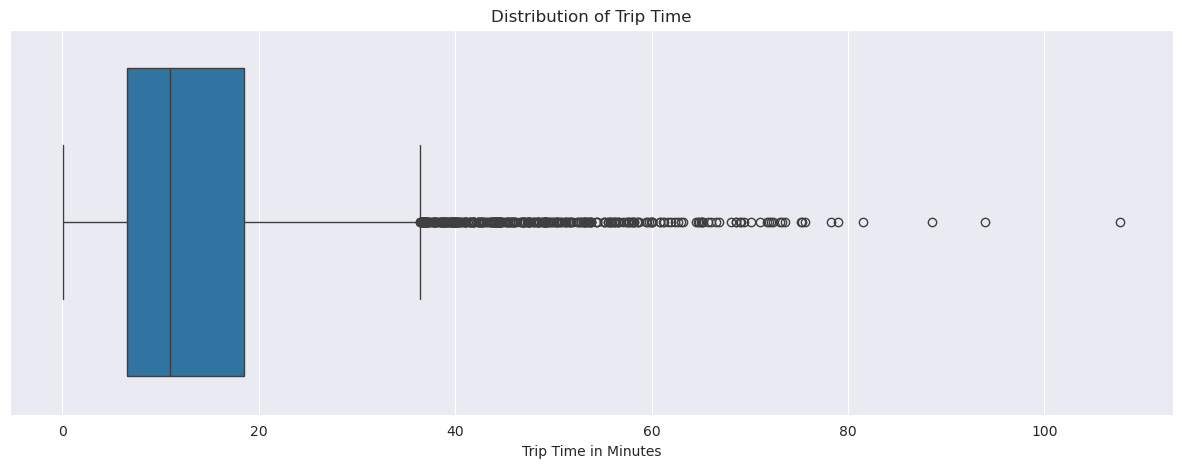

In [41]:
plt.figure(figsize = (15,5))
sns.boxplot(data = df, 
           x = 'trip_time_minutes')


plt.title('Distribution of Trip Time')
plt.xlabel('Trip Time in Minutes')

> monday is just under 14 minutes, tuesday is about 14 minutes and 30 seconds, wednesday is around 15 minutes and 30 seconds alongside thursday, friday is around 14 minutes and 30 seconds, with saturday being 13 minutes and 30 seconds and sunday being 12 minutes and 30 seconds

Text(0, 0.5, 'Average Trip Time')

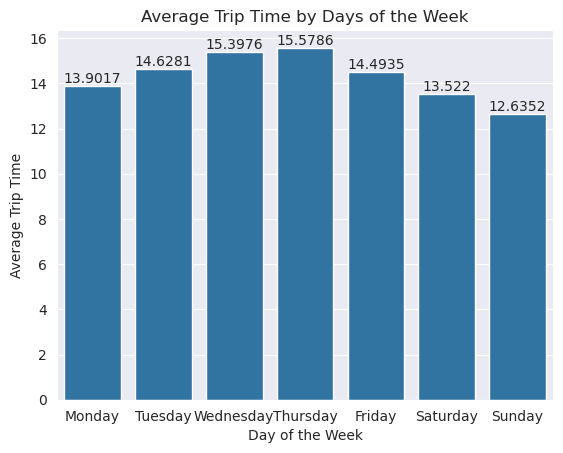

In [42]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ax = sns.barplot(data = df, 
           x = 'day_of_week', 
           y = 'trip_time_minutes',
           errorbar = None,      
           order = day_order)

ax.bar_label(ax.containers[0], label_type = 'edge')
plt.title('Average Trip Time by Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Trip Time')

4. **Borough Analysis**:
   - **Question**: Which boroughs are the most common pickup locations?
     - **Visualization**: Plot a count plot to display the frequency of pickups in each borough.
   - **Question**: How many passengers get dropped off in the same borough as where they were picked up?
     - **Visualization**: Plot a count plot to display the frequency same_borough.



> the borough that is the most common pickup location is Manhattan, with Queens being a very distant second.

Text(0, 0.5, 'Number of Trips')

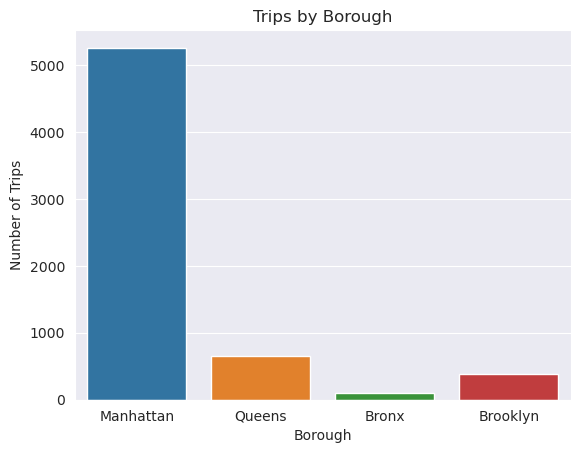

In [43]:
sns.countplot(df, 
             x = 'pickup_borough', 
             hue = 'pickup_borough')
plt.title('Trips by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Trips')

> 5582 passenfers get droped off in the same borough as where they get picked up

Text(0, 0.5, 'Frequency of Trips')

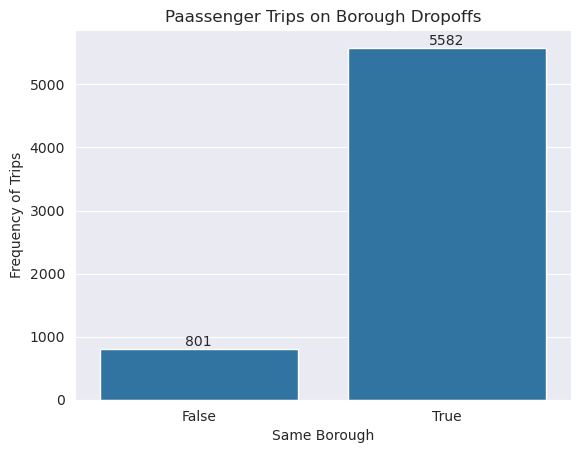

In [44]:
ax = sns.countplot(df, 
             x = 'same_borough',  
             legend = None)


ax.bar_label(ax.containers[0], label_type = 'edge')
plt.title('Paassenger Trips on Borough Dropoffs')
plt.xlabel('Same Borough')
plt.ylabel('Frequency of Trips')

5. **Time Analysis**:
   - **Question**: What are the busiest times for taxi rides?
     - **Visualization**: Create a count plot to show the number of trips per hour.

> the bussiest times for taxi rides appear to be towrds the evening, with the three most common trip times being 6:00 pm, 7:00 pm, and 5:00pm

Text(0, 0.5, 'Amount of Trips')

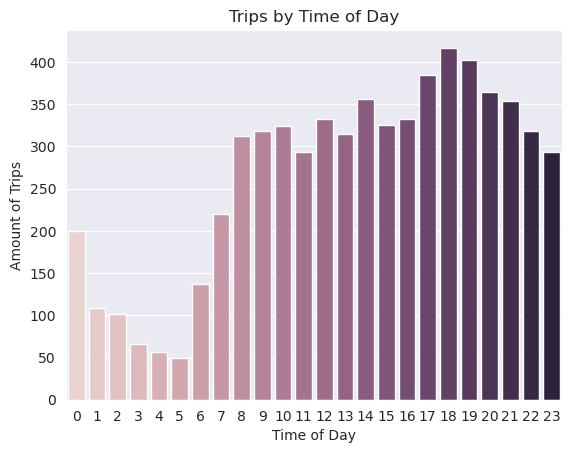

In [46]:
sns.countplot(df, 
             x = 'time_of_day', 
             hue = 'time_of_day',
             legend = None)
plt.title('Trips by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Amount of Trips')

6. **Payment Analysis**:
   - **Question**: What are the most common payment methods used by passengers?
     - **Visualization**: Generate a count plot to visualize the distribution of payment methods.

> 

> the most common payment method is credit cards

Text(0, 0.5, 'Occurences')

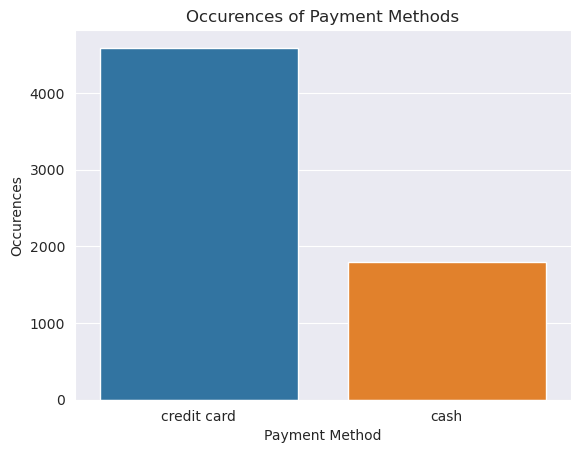

In [47]:
ax = sns.countplot(df, 
             x = 'payment', 
             hue = 'payment')
plt.title('Occurences of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Occurences')



7. **Color Analysis**:
   - **Question**: Are there differences in fare amount based on taxi color?
     - **Visualization**: Create a box plot to compare fare amounts for different taxi colors.

> green taxis appear to be marginally more expensive, and they appear to have a range of prices that go higher then the fare prices for yellow taxis when excluding outliers

Text(0, 0.5, 'Fare Price')

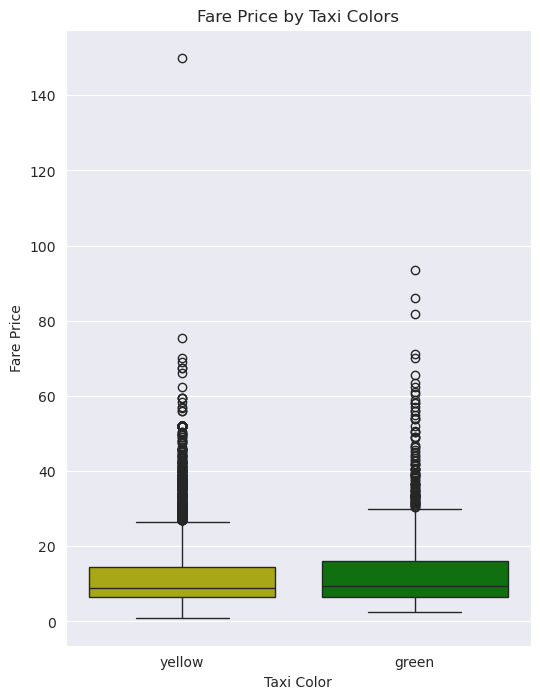

In [48]:
plt.figure(figsize = (6, 8))
sns.boxplot(df, 
           x = 'color',
           y = 'fare', 
           hue = 'color',
           palette = ('y','g'))
plt.title('Fare Price by Taxi Colors')
plt.xlabel('Taxi Color')
plt.ylabel('Fare Price')



8. **Anything Else to Explore?**:
   - Curious about any other trends you'd like to investigate? Add at least one more visualization of your choosing!